In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


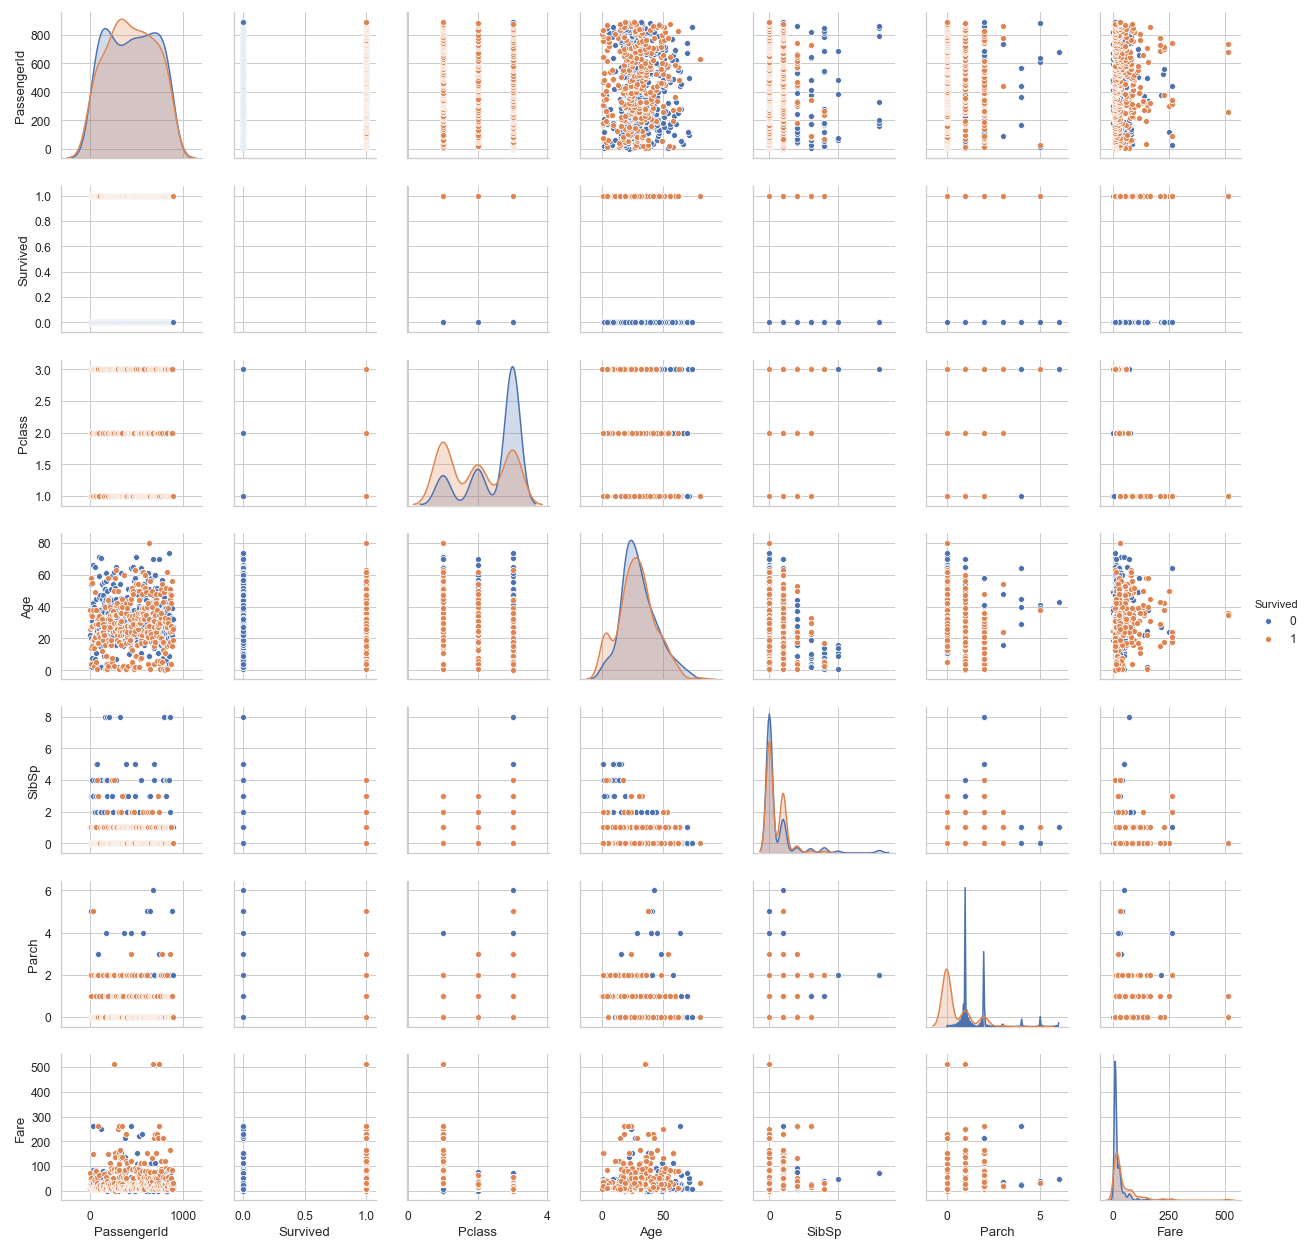

In [7]:
#Pair Plots
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.pairplot(train, hue ='Survived')


In [5]:
#Mean comparison
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


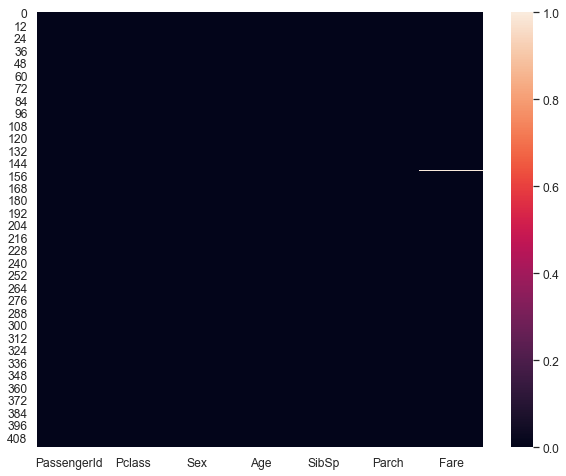

In [34]:
#Checking null values
sns.heatmap(test.isnull())

## Data Cleaning

In [25]:
train_dropped = train.drop(['Cabin','Name','Ticket','Embarked'],axis=1)
test = test.drop(['Cabin','Name','Ticket','Embarked'],axis=1)

In [26]:
train_dropped['Sex'] = train_dropped['Sex'].replace(to_replace ="male", value = 1) 
train_dropped['Sex'] = train_dropped['Sex'].replace(to_replace ="female", value = 0) 

test['Sex'] = test['Sex'].replace(to_replace ="male", value = 1) 
test['Sex'] = test['Sex'].replace(to_replace ="female", value = 0) 

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
            return Age

In [28]:
train_dropped['Age'] = train_dropped[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

## Model Building

In [30]:
X_train = train_dropped.drop("Survived", axis=1)
Y_train = train_dropped["Survived"]
X_test  = test

In [35]:
X_test = X_test.fillna(X_test.mean())

In [233]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(train_dropped.drop('Survived',axis=1), 
#                                                    train_dropped['Survived'], test_size= .469 ,)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
len(predictions)

418

In [39]:
test['Survived'] = predictions

In [40]:
results = test[['PassengerId','Survived']]

In [41]:
results.to_csv('daos_titanic_results.csv',  index=False)